In [1]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2022-07-16 16:11:56.679867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-16 16:11:56.679903: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#get the web quoted
df = pd.read_csv('/home/icarus/Downloads/NTC.csv', index_col = 'Date', parse_dates=True)
df

,Price,Change,Max Price,Min Price,Prev Price,Transaction,Volume,Amount
Date,,,,,,,,
2019-03-03,685.0,1.0,697.0,677.0,684.0,24,926,632043
2019-03-05,680.0,-5.0,689.0,678.0,685.0,25,3790,2576430
2019-03-06,680.0,0.0,680.0,670.0,680.0,27,4244,2881530
2019-03-07,684.0,4.0,685.0,678.0,680.0,27,3968,2700820
2019-03-10,682.0,-2.0,684.0,680.0,684.0,12,1510,1027820
...,...,...,...,...,...,...,...,...
2022-07-01,895.0,-15.0,928.2,893.5,910.0,280,26002,23485200
2022-07-03,948.0,53.0,953.0,885.1,895.0,432,36721,33903000
2022-07-04,938.0,-10.0,973.0,910.0,948.0,732,62641,59627600


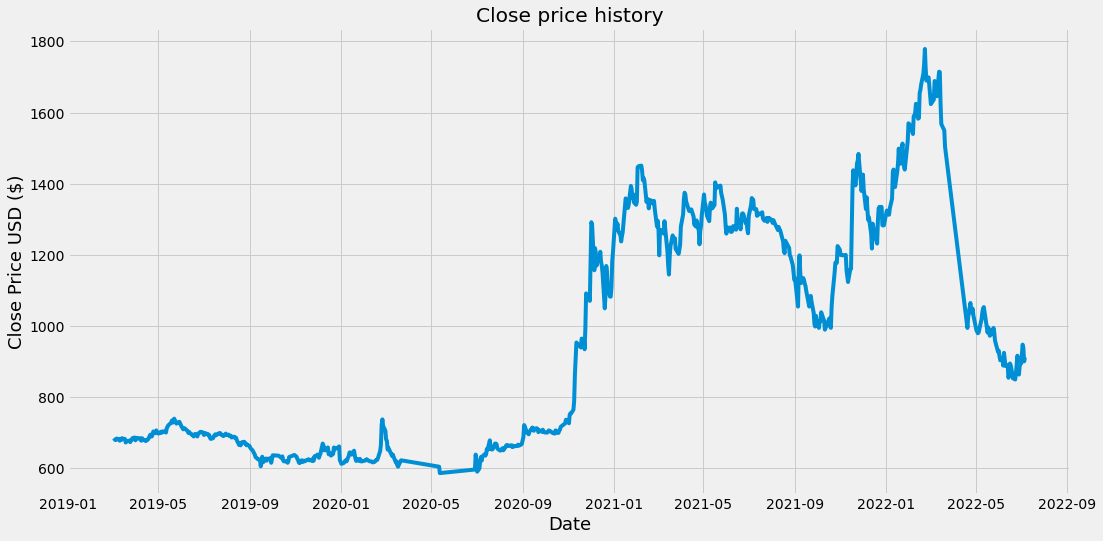

In [3]:
#visualize the closing price hostory
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Price'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [4]:
#create a new dataframe with only the close column
data = df.filter(['Price'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = round(len(dataset)*  .8)
training_data_len

584

In [65]:
#scale the data
#apply preprocessing input datas before feeding to lstm model
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) #the range will be 0 to 1 inclusive

In [39]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

In [7]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#reshaoe the data lstm expecting three dimensional data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(524, 60, 1)

In [26]:
# build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1 )))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
#complile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#train the model
model.fit(x_train, y_train, batch_size =1, epochs = 25)

Epoch 1/25
524/524 [==============================] - 40s 76ms/step - loss: 0.0017
Epoch 2/25
524/524 [==============================] - 42s 80ms/step - loss: 0.0014
Epoch 3/25
524/524 [==============================] - 49s 93ms/step - loss: 0.0013
Epoch 4/25
524/524 [==============================] - 49s 94ms/step - loss: 0.0011
Epoch 5/25
524/524 [==============================] - 55s 105ms/step - loss: 9.7867e-04
Epoch 6/25
524/524 [==============================] - 49s 93ms/step - loss: 8.9501e-04
Epoch 7/25
524/524 [==============================] - 50s 96ms/step - loss: 9.1226e-04
Epoch 8/25
524/524 [==============================] - 47s 89ms/step - loss: 6.9482e-04
Epoch 9/25
524/524 [==============================] - 49s 94ms/step - loss: 6.8272e-04
Epoch 10/25
524/524 [==============================] - 45s 87ms/step - loss: 7.9370e-04
Epoch 11/25
524/524 [==============================] - 45s 85ms/step - loss: 7.3031e-04
Epoch 12/25
524/524 [==============================] - 4

In [31]:
#create the testing data settest_data = scaled_data[training_data_len - 60:, :]
#create the data set x_test and y_test
x_test = []
y_test= dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [32]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [33]:
#reshape the data as data set needs to be three dimensional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [34]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 0s 63ms/step


In [38]:
#get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

27.2150281932256

/tmp/ipykernel_81858/3053247760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


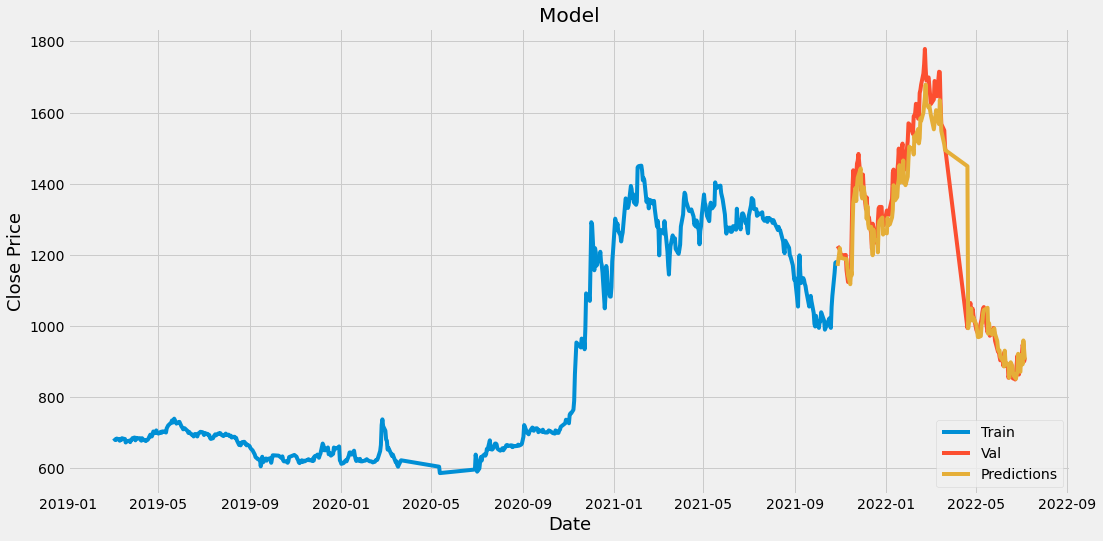

In [36]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions' ]])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [37]:
#get the quote
quote = pd.read_csv('/home/icarus/Downloads/NTC.csv', index_col = 'Date', parse_dates=True)
#create a new dataframe
a = quote.filter(['Price'])
#get the last 60 days closing values and convert the dataframe to an array
last_60_days = a[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days to X_test list
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
#predicts next day price

1/1 [==============================] - 0s 98ms/step
[[920.8422]]
